# Dropout, Batch Norm

# Batch Processing, Mini-Batch Processing
1 Batch = 1 Epoch  
There are many mini-batches in an epoch

# Different Optimizers (SGD)

In [1]:
from __future__ import print_function
import torch; print(torch.__version__)

1.0.1


In [2]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim #set of optimizers
import torch.utils.data as utils #inputs/outputs
import matplotlib.pyplot as plt

In [3]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # an affine operation: y = Wx + b
        # 2 hidden layers?
        self.fc1 = nn.Linear(1, 500)
        #self.bn1 = nn.BatchNorm1d(num_features=500)
        self.fc2 = nn.Linear(500, 500)
        #self.dropout = nn.Dropout(.5) # Eliminates half the features randomly
        self.fc3 = nn.Linear(500, 1)

    def forward(self, x):
        #x = F.relu(self.bn1(self.fc1(x)))
        x = F.relu(self.fc1(x))
        # x = F.relu(self.dropout(self.fc2(x)))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=1, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=1, bias=True)
)


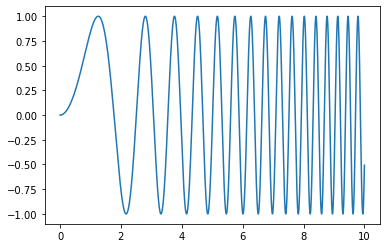

100000


In [12]:
inputs = Variable(torch.arange(0,10,.0001))
#true_vals = torch.mul(inputs, inputs)
true_vals = torch.sin(inputs * inputs)
plt.plot(list(inputs.data), list(true_vals.data))
plt.show()
print(len(inputs))

In [13]:
net.zero_grad()
outputs = net(Variable(torch.Tensor([0])))
outputs.backward(torch.randn(1)) # Use random gradients to break symmetry?

learning_rate = 1 # Need to initialize carefully
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

ML (loss=0.628549): 100%|██████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 57.47it/s]


Finished Training


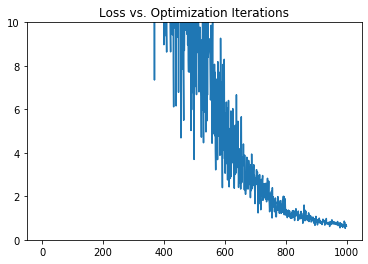

[5306244.0, 3961798.0, 3900259.5, 3734292.75, 3270006.25, 2789577.25, 2452475.25, 1876042.125, 1858845.0, 1408323.5, 1278797.0, 1084979.0, 888861.9375, 750586.5, 598530.625, 479699.21875, 380044.40625, 297444.90625, 238969.90625, 188392.46875, 170633.078125, 129117.296875, 90187.46875, 86747.1953125, 85136.96875, 72323.6171875, 61340.40234375, 47218.6875, 42402.68359375, 42743.26953125, 42902.53125, 27461.71484375, 35335.02734375, 34583.875, 18595.224609375, 27582.81640625, 22603.134765625, 20931.412109375, 24245.884765625, 22582.716796875, 18724.380859375, 19468.35546875, 23081.486328125, 25494.810546875, 18332.611328125, 21480.755859375, 13609.5146484375, 21927.392578125, 20947.328125, 17650.904296875, 13013.236328125, 19242.654296875, 18904.18359375, 15417.6611328125, 16667.03515625, 11046.345703125, 14199.59765625, 12853.576171875, 13621.77734375, 12757.3486328125, 17155.2109375, 12806.716796875, 10906.4208984375, 8511.4267578125, 9078.599609375, 8793.09765625, 12060.140625, 11487.

In [14]:
from tqdm import trange # Used to provide progress bar
import numpy as np

losses = []
batch_size = 100 # number of points per mini-batch

# create your optimizer
optimizer = optim.Adam(net.parameters())
# optimizer = optim.SGD(model.parameters(), lr=0.01) # A different optimizer frequently used with minibatches
criterion = nn.MSELoss()

num_epochs = 1
for epoch in range(num_epochs):  # loop over the dataset multiple times
    
    # Shuffle all the data
    idx = np.arange(len(inputs))
    np.random.shuffle(idx)
    inputs = inputs[idx]
    true_vals = true_vals[idx]

    # wrap them in Variable
    reshaped_inputs = inputs.view(-1, 1) # Structure with each input in its own row
    reshaped_outputs = true_vals.view(-1, 1) # Neglecting to have outputs and true vals to match dimension is a common mistake.

    current_batch = 0
    t = trange(reshaped_outputs.shape[0] // batch_size)
    for iteration in t:

        batch_x = reshaped_inputs[current_batch: current_batch + batch_size]
        batch_y = reshaped_outputs[current_batch: current_batch + batch_size]
        current_batch += batch_size
        
        if len(batch_x) > 0:
            # forward + backward + optimize
            outputs = net(batch_x)
            #print(outputs)
            #print(reshaped_outputs)
            loss = criterion(outputs, batch_y)
            losses.append(loss.item())

            loss.backward()
            optimizer.step()

            # zero the parameter gradients
            optimizer.zero_grad()

            t.set_description('ML (loss=%g)' % loss.item()) # Updates Loss information
            #t.set_description('ML Loss: ' + str(loss.item())) # Updates Loss information

print('Finished Training')

plt.plot(range(len(losses)), losses)
plt.ylim(0, 10) # Set convenient plotting limits to see the interesting region.
plt.title("Loss vs. Optimization Iterations")
plt.show()

#print(losses)